### Stock Price Predictions with Machine Learning

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from datetime import datetime, timedelta
import sklearn.metrics as metrics
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
data=pd.read_csv("AAPL.csv")
data.set_index('Date', inplace=True)

In [3]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-08-01,37.275002,37.555000,37.102501,37.512501,35.609295,141474400
2017-08-02,39.820000,39.937500,39.040001,39.285000,37.291874,279747200
2017-08-03,39.262501,39.302502,38.755001,38.892502,36.919292,108389200
2017-08-04,39.017502,39.349998,38.922501,39.097500,37.113876,82239600
2017-08-07,39.264999,39.730000,39.167500,39.702499,37.688194,87481200


In [4]:
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1113 entries, 2017-08-01 to 2021-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1113 non-null   float64
 1   High       1113 non-null   float64
 2   Low        1113 non-null   float64
 3   Close      1113 non-null   float64
 4   Adj Close  1113 non-null   float64
 5   Volume     1113 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 60.9+ KB


In [6]:
df=data
df['difference']= data['High']-data['Low']

result=[]
for open,close in zip(data['Open'],data['Close']):
    if (open > close): 
        result.append(0)
    else: 
        result.append(1)
df['Result']=result

In [7]:
df['Result'].value_counts()

1    594
0    519
Name: Result, dtype: int64

<AxesSubplot:xlabel='Result', ylabel='count'>

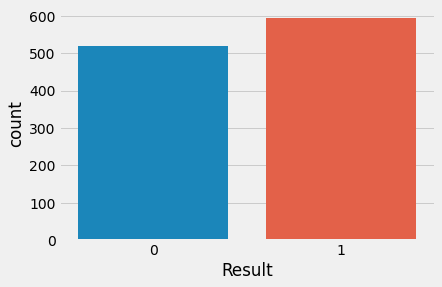

In [8]:
sns.countplot(x='Result',data=df)

In [9]:
df

,Open,High,Low,Close,Adj Close,Volume,difference,Result
Date,,,,,,,,
2017-08-01,37.275002,37.555000,37.102501,37.512501,35.609295,141474400,0.452499,1
2017-08-02,39.820000,39.937500,39.040001,39.285000,37.291874,279747200,0.897499,0
2017-08-03,39.262501,39.302502,38.755001,38.892502,36.919292,108389200,0.547501,0
2017-08-04,39.017502,39.349998,38.922501,39.097500,37.113876,82239600,0.427497,1
2017-08-07,39.264999,39.730000,39.167500,39.702499,37.688194,87481200,0.562500,1
...,...,...,...,...,...,...,...,...
2021-12-23,175.850006,176.850006,175.270004,176.279999,176.279999,68356600,1.580002,1
2021-12-27,177.089996,180.419998,177.070007,180.330002,180.330002,74919600,3.349991,1
2021-12-28,180.160004,181.330002,178.529999,179.289993,179.289993,79144300,2.800003,0


In [10]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,difference,Result
count,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1.113000e+03,1113.000000,1113.000000
mean,79.711094,80.606018,78.862767,79.777886,78.689291,1.230292e+08,1.743250,0.533693
std,40.366473,40.844018,39.891479,40.396540,40.851107,5.704093e+07,1.465749,0.499088
min,35.994999,36.430000,35.500000,35.547501,34.508709,4.100000e+07,0.212502,0.000000
25%,45.880001,46.235001,45.302502,45.932499,44.448593,8.456650e+07,0.694999,0.000000
50%,58.647499,59.395000,58.299999,58.820000,57.785587,1.088292e+08,1.275002,1.000000
75%,120.500000,122.169998,119.000000,120.879997,120.011826,1.455380e+08,2.370010,1.000000
max,181.119995,182.130005,178.529999,180.330002,180.330002,4.265100e+08,12.809998,1.000000


In [11]:
df1=df.reset_index()['Close']

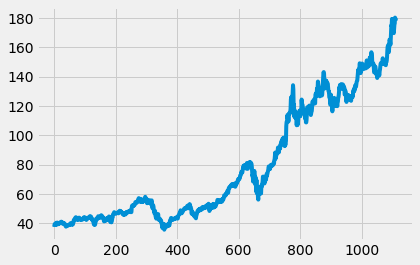

In [12]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [13]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'difference',
       'Result'],
      dtype='object')

In [14]:
df

,Open,High,Low,Close,Adj Close,Volume,difference,Result
Date,,,,,,,,
2017-08-01,37.275002,37.555000,37.102501,37.512501,35.609295,141474400,0.452499,1
2017-08-02,39.820000,39.937500,39.040001,39.285000,37.291874,279747200,0.897499,0
2017-08-03,39.262501,39.302502,38.755001,38.892502,36.919292,108389200,0.547501,0
2017-08-04,39.017502,39.349998,38.922501,39.097500,37.113876,82239600,0.427497,1
2017-08-07,39.264999,39.730000,39.167500,39.702499,37.688194,87481200,0.562500,1
...,...,...,...,...,...,...,...,...
2021-12-23,175.850006,176.850006,175.270004,176.279999,176.279999,68356600,1.580002,1
2021-12-27,177.089996,180.419998,177.070007,180.330002,180.330002,74919600,3.349991,1
2021-12-28,180.160004,181.330002,178.529999,179.289993,179.289993,79144300,2.800003,0


In [15]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,difference,Result
count,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1.113000e+03,1113.000000,1113.000000
mean,79.711094,80.606018,78.862767,79.777886,78.689291,1.230292e+08,1.743250,0.533693
std,40.366473,40.844018,39.891479,40.396540,40.851107,5.704093e+07,1.465749,0.499088
min,35.994999,36.430000,35.500000,35.547501,34.508709,4.100000e+07,0.212502,0.000000
25%,45.880001,46.235001,45.302502,45.932499,44.448593,8.456650e+07,0.694999,0.000000
50%,58.647499,59.395000,58.299999,58.820000,57.785587,1.088292e+08,1.275002,1.000000
75%,120.500000,122.169998,119.000000,120.879997,120.011826,1.455380e+08,2.370010,1.000000
max,181.119995,182.130005,178.529999,180.330002,180.330002,4.265100e+08,12.809998,1.000000


<AxesSubplot:xlabel='Date'>

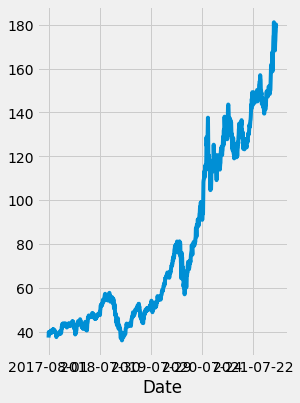

In [16]:
df['Open'].plot(figsize=(4,6))

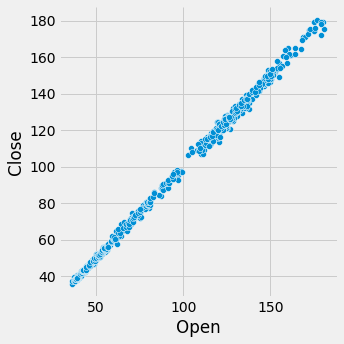

In [17]:
sns.relplot(x="Open", y="Close", data=df, kind="scatter");

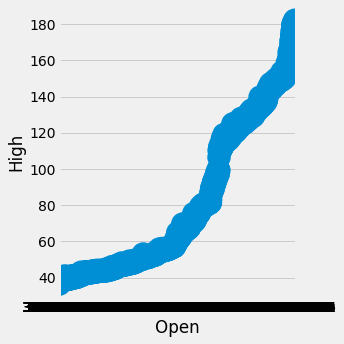

In [18]:
sns.catplot(x="Open", y="High", data=df, kind="point")

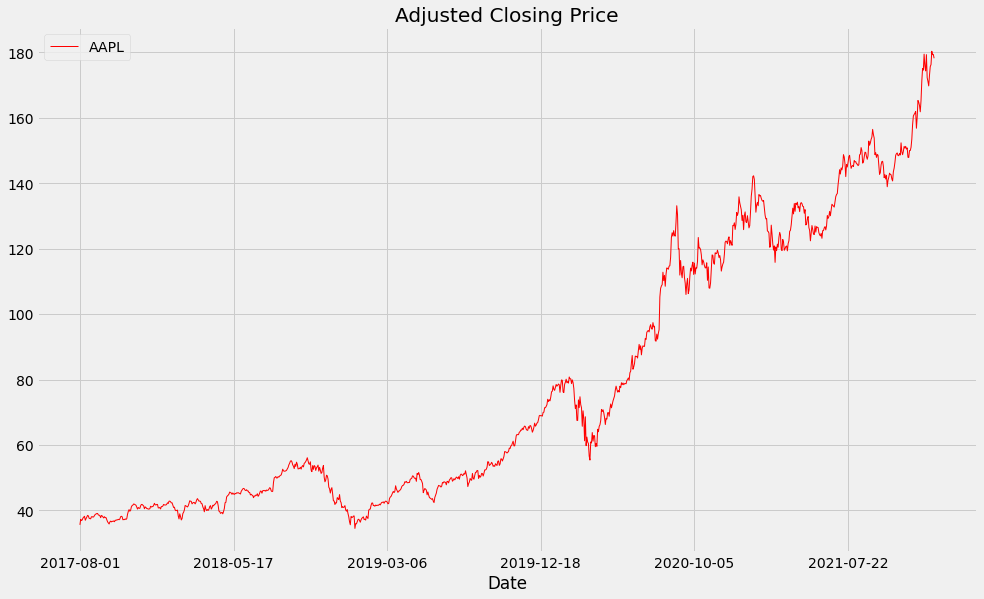

In [19]:
df['Adj Close'].plot(label='AAPL', figsize=(15, 9), title='Adjusted Closing Price', color='red', linewidth=1.0, grid=True)
plt.legend()

In [20]:
close_col = df['Adj Close']
mvag = close_col.rolling(window=100).mean() 

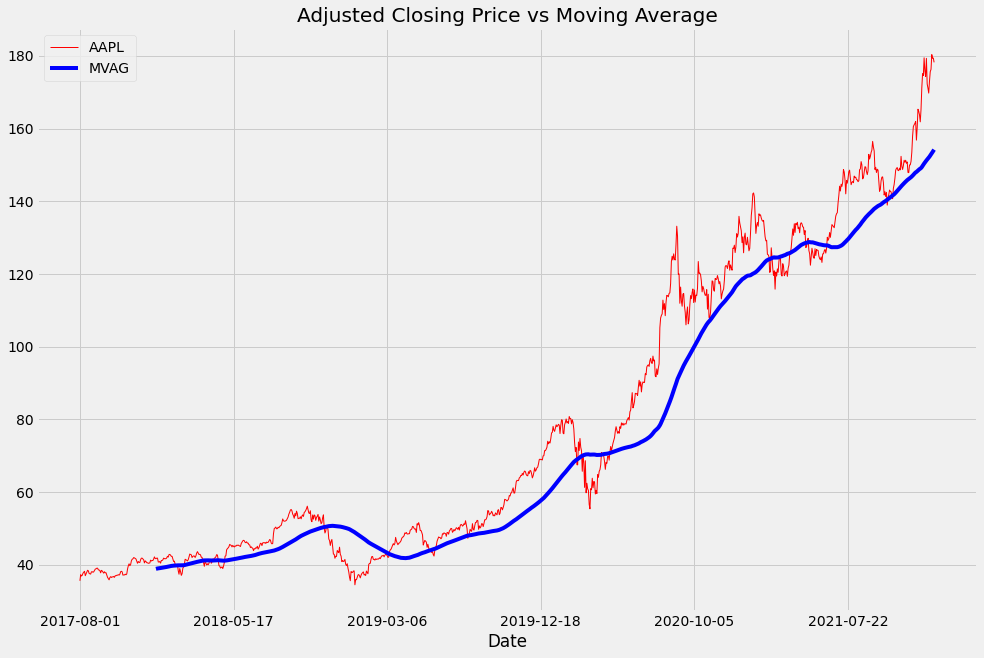

In [21]:
df['Adj Close'].plot(label='AAPL', figsize=(15,10), title='Adjusted Closing Price vs Moving Average', color='red', linewidth=1.0, grid=True)
mvag.plot(label='MVAG', color='blue')
plt.legend()

In [22]:
df.corr()

,Open,High,Low,Close,Adj Close,Volume,difference,Result
Open,1.000000,0.999781,0.999690,0.999455,0.999427,-0.193041,0.652183,-0.014945
High,0.999781,1.000000,0.999619,0.999715,0.999693,-0.185283,0.660231,-0.004840
Low,0.999690,0.999619,1.000000,0.999725,0.999702,-0.203280,0.639252,-0.004219
Close,0.999455,0.999715,0.999725,1.000000,0.999974,-0.195089,0.649406,0.006717
Adj Close,0.999427,0.999693,0.999702,0.999974,1.000000,-0.194768,0.649423,0.006575
Volume,-0.193041,-0.185283,-0.203280,-0.195089,-0.194768,1.000000,0.369408,-0.067341
difference,0.652183,0.660231,0.639252,0.649406,0.649423,0.369408,1.000000,-0.020041
Result,-0.014945,-0.004840,-0.004219,0.006717,0.006575,-0.067341,-0.020041,1.000000


In [23]:
df.describe(include='all')

,Open,High,Low,Close,Adj Close,Volume,difference,Result
count,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1.113000e+03,1113.000000,1113.000000
mean,79.711094,80.606018,78.862767,79.777886,78.689291,1.230292e+08,1.743250,0.533693
std,40.366473,40.844018,39.891479,40.396540,40.851107,5.704093e+07,1.465749,0.499088
min,35.994999,36.430000,35.500000,35.547501,34.508709,4.100000e+07,0.212502,0.000000
25%,45.880001,46.235001,45.302502,45.932499,44.448593,8.456650e+07,0.694999,0.000000
50%,58.647499,59.395000,58.299999,58.820000,57.785587,1.088292e+08,1.275002,1.000000
75%,120.500000,122.169998,119.000000,120.879997,120.011826,1.455380e+08,2.370010,1.000000
max,181.119995,182.130005,178.529999,180.330002,180.330002,4.265100e+08,12.809998,1.000000


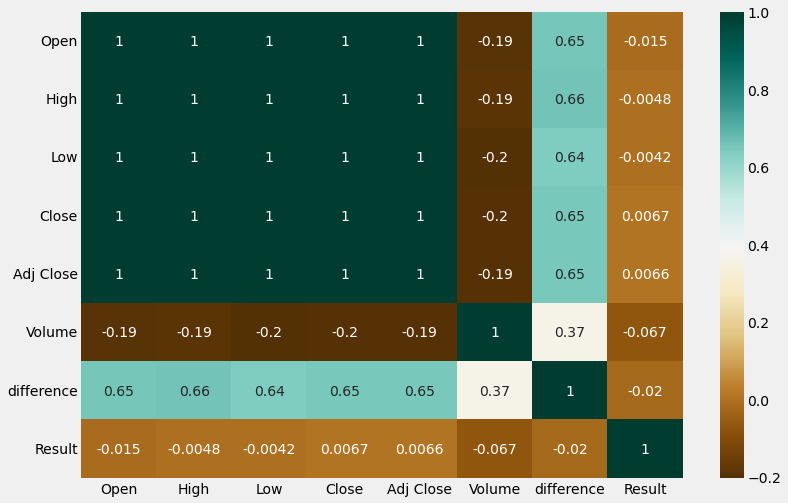

In [24]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cmap='BrBG',annot=True)
plt.show()

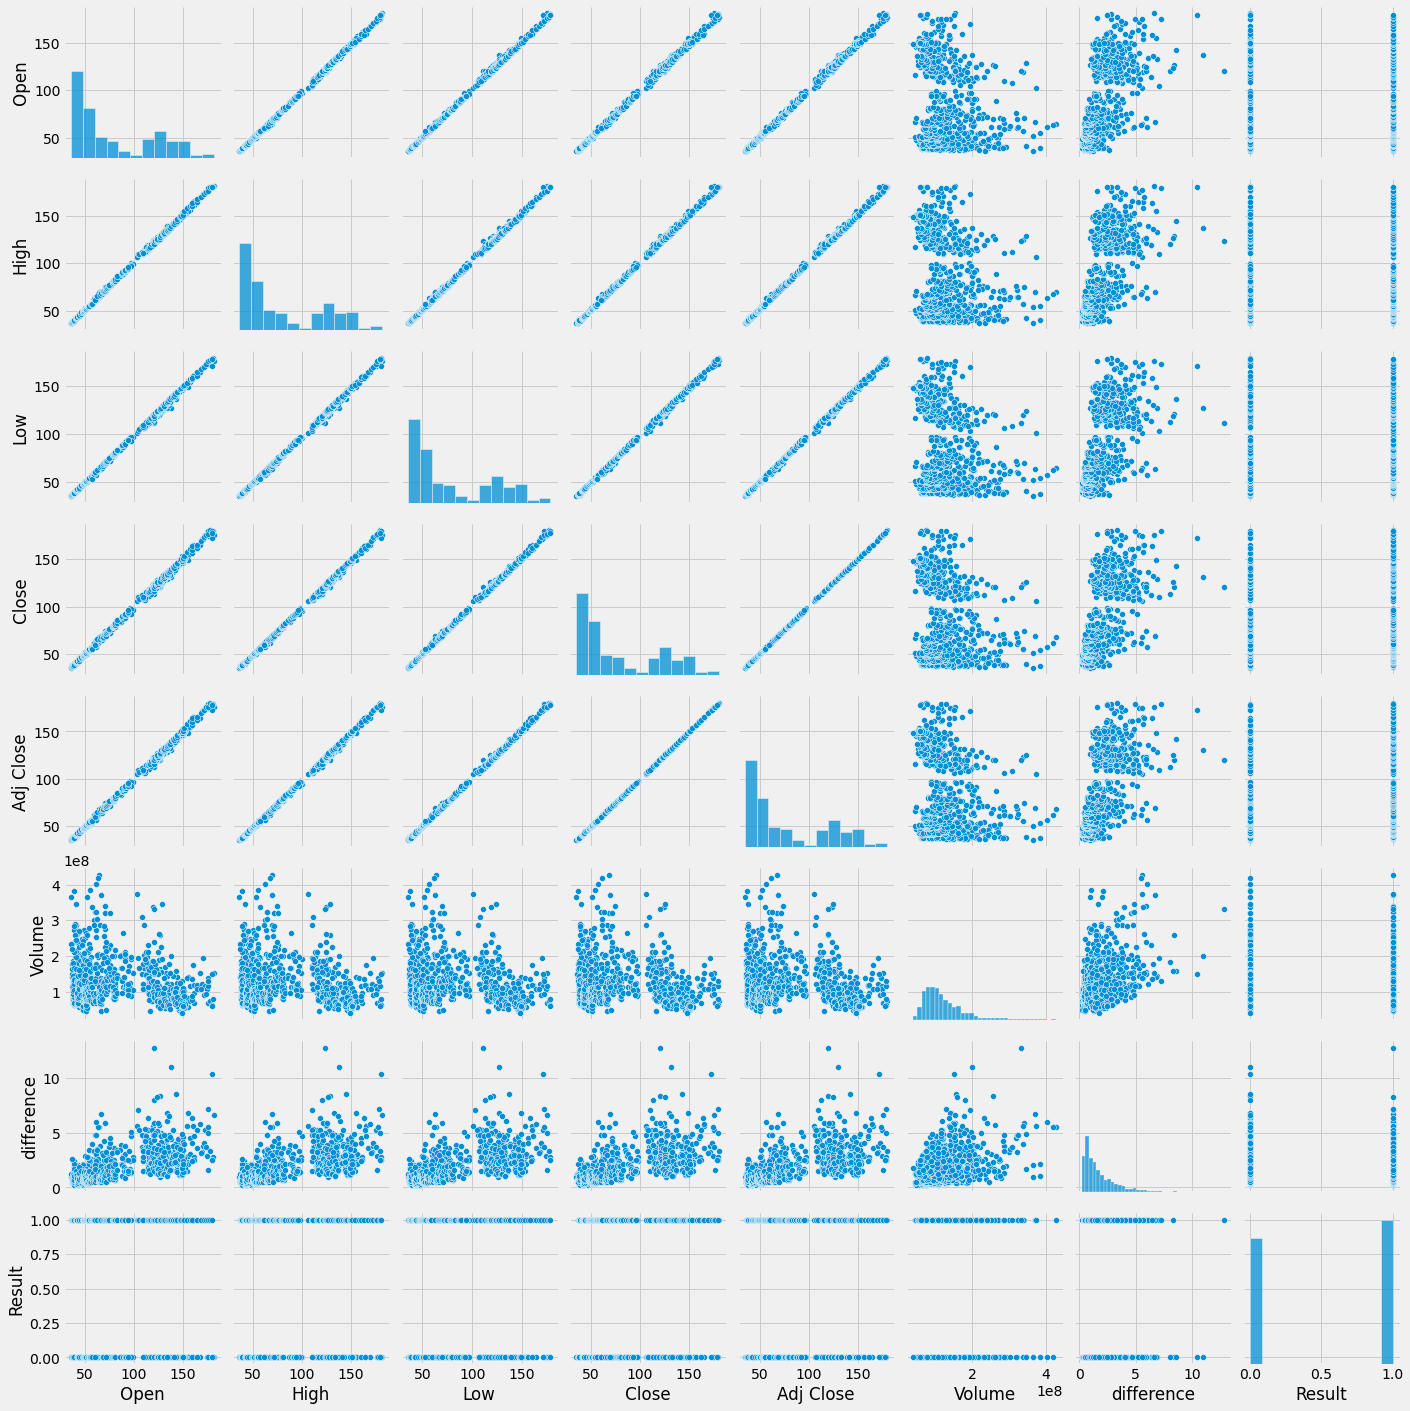

In [25]:
#sns.pairplot(df)

In [26]:
predict_days = 30

In [27]:
df['Prediction'] = df['Adj Close'].shift(-predict_days)        

In [28]:
X = np.array(df.drop(['Prediction'], axis = 1))
X = X[:-predict_days]

In [29]:
y = np.array(df['Prediction'])
y = y[:-predict_days]

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2)

In [31]:
X_train.shape

(866, 8)

In [32]:
X_test.shape

(217, 8)

### Linear Regression

In [33]:
from sklearn import linear_model
from sklearn.metrics import confusion_matrix,accuracy_score

In [34]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [35]:
linear_model_score = linear_model.score(X_test, y_test)
print('Linear Model score:', linear_model_score)

Linear Model score: 0.9675146114653919


In [36]:
X_predict = np.array(df.drop(['Prediction'], 1))[-predict_days:]

linear_model_predict_prediction = linear_model.predict(X_predict)
linear_model_real_prediction = linear_model.predict(np.array(df.drop(['Prediction'], 1)))

<ipython-input-36-9032b92a972c>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_predict = np.array(df.drop(['Prediction'], 1))[-predict_days:]
<ipython-input-36-9032b92a972c>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  linear_model_real_prediction = linear_model.predict(np.array(df.drop(['Prediction'], 1)))


In [37]:
predicted_dates = []
recent_date = df.index.max()
display_at = 1000
alpha = 0.5

for i in range(predict_days):
    recent_date += str(timedelta(days=1))
    predicted_dates.append(recent_date)

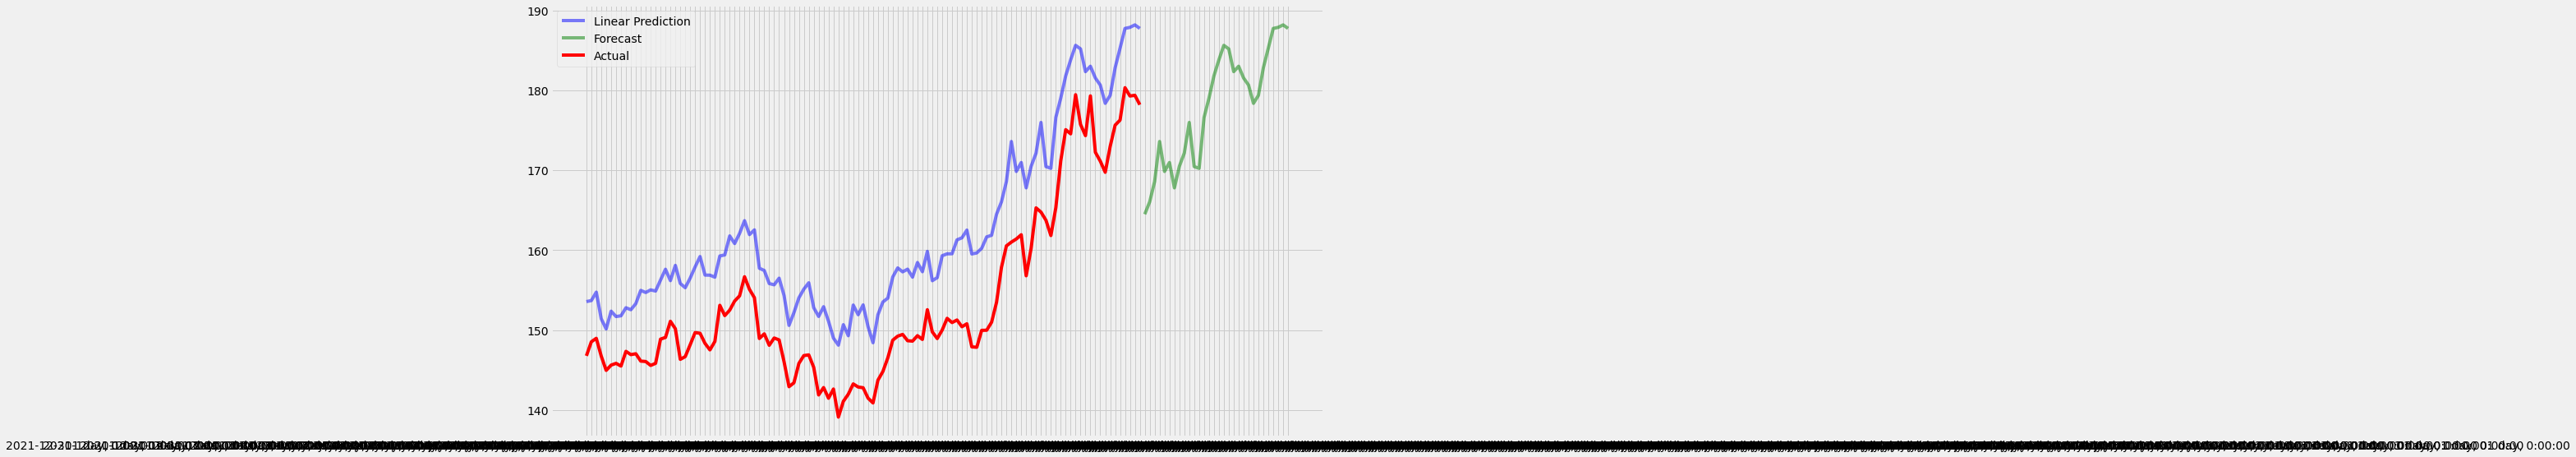

In [38]:
plt.figure(figsize=(15, 9))
plt.plot(df.index[display_at:], linear_model_real_prediction[display_at:], label='Linear Prediction', color='blue', alpha=alpha)
plt.plot(predicted_dates, linear_model_predict_prediction, label='Forecast', color='green', alpha=alpha)
plt.plot(df.index[display_at:], df['Close'][display_at:], label='Actual', color='red')
plt.legend()

### Ridge Regression

In [39]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [40]:
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

c:\users\pulkit\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.46192e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Ridge()

In [41]:
ridge_model_score = ridge_model.score(X_test, y_test)
print('Ridge Model score:', ridge_model_score)

Ridge Model score: 0.9675753250092142


In [42]:
ridge_model_predict_prediction = ridge_model.predict(X_predict)
ridge_model_real_prediction = ridge_model.predict(np.array(df.drop(['Prediction'], 1)))

<ipython-input-42-43584a06a613>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  ridge_model_real_prediction = ridge_model.predict(np.array(df.drop(['Prediction'], 1)))


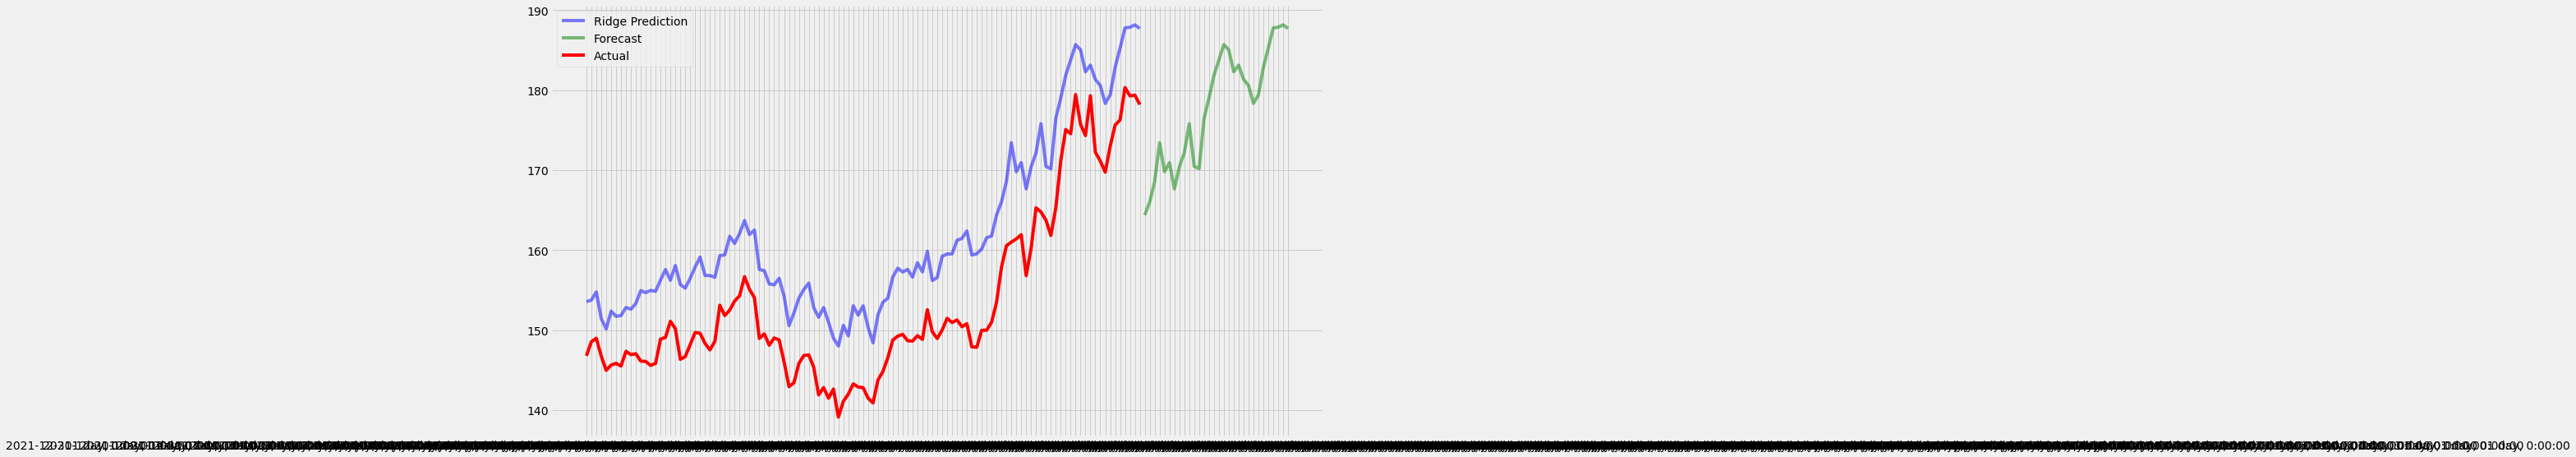

In [43]:
plt.figure(figsize=(15, 9))
plt.plot(df.index[display_at:], ridge_model_real_prediction[display_at:], label='Ridge Prediction', color='blue', alpha=alpha)
plt.plot(predicted_dates, ridge_model_predict_prediction, label='Forecast', color='green', alpha=alpha)
plt.plot(df.index[display_at:], df['Close'][display_at:], label='Actual', color='red')
plt.legend()

### Lasso Regression

In [44]:
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)

c:\users\pulkit\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 264.4990340789809, tolerance: 142.78158926333384
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [45]:
lasso_model_score = lasso_model.score(X_test, y_test)
print('Lasso Model score:', lasso_model_score)


Lasso Model score: 0.9609173011311412


In [46]:
lasso_model_predict_prediction = lasso_model.predict(X_predict)
lasso_model_real_prediction = lasso_model.predict(np.array(df.drop(['Prediction'], 1)))

<ipython-input-46-05e8744047d9>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  lasso_model_real_prediction = lasso_model.predict(np.array(df.drop(['Prediction'], 1)))


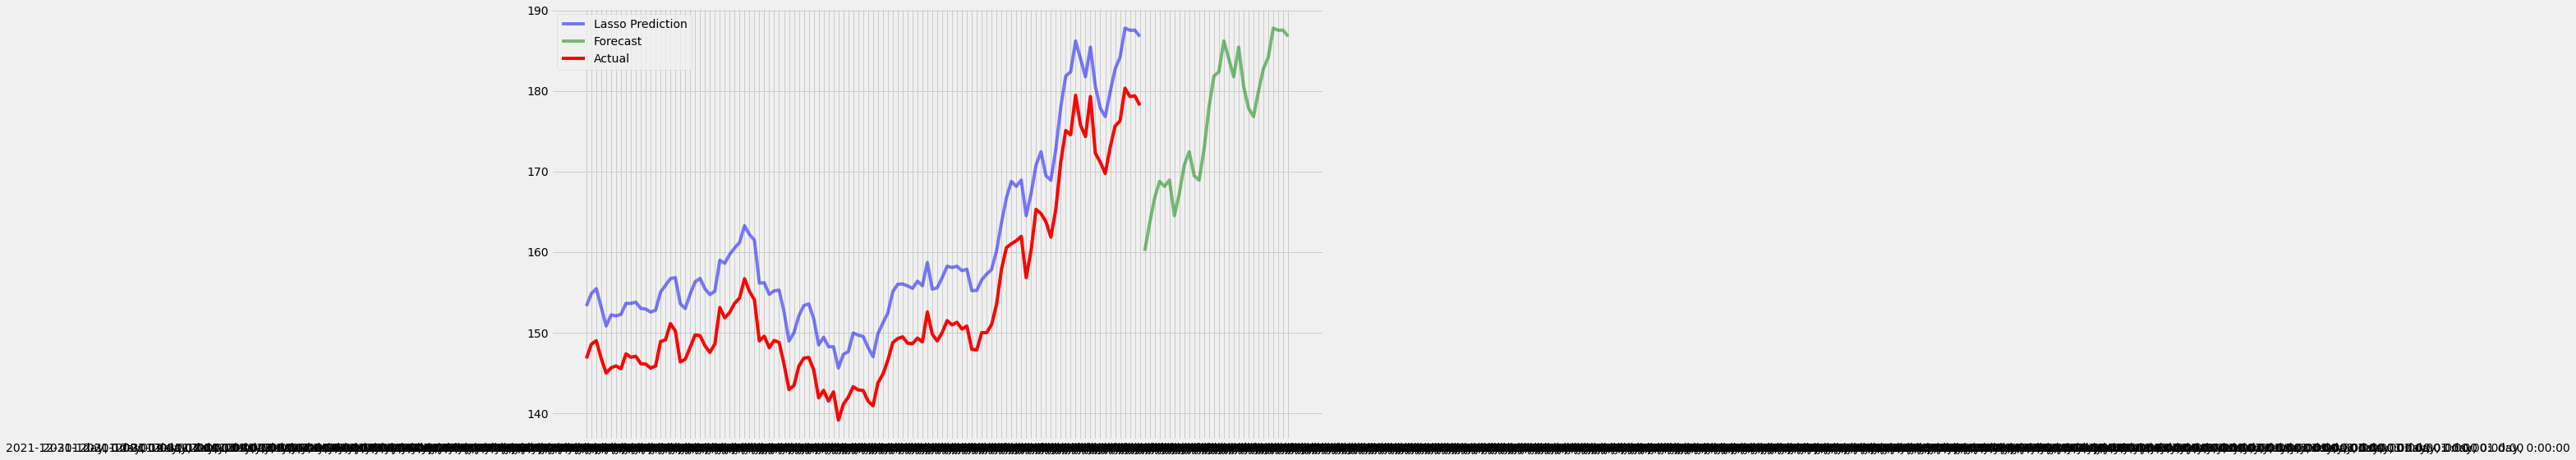

In [47]:
plt.figure(figsize=(15, 9))
plt.plot(df.index[display_at:], lasso_model_real_prediction[display_at:], label='Lasso Prediction', c='blue', alpha=alpha)
plt.plot(predicted_dates, lasso_model_predict_prediction, label='Forecast', color='green', alpha=alpha)
plt.plot(df.index[display_at:], df['Close'][display_at:], label='Actual', color='red')
plt.legend()

In [48]:
best_score = max(linear_model_score, ridge_model_score, lasso_model_score)
index = np.argmax([linear_model_score, ridge_model_score, lasso_model_score])
best_regressor = {0:'Linear Regression Model',
                  1:'Ridge Model',
                  2:'Lasso Model'}
print("The Best Performer is {0} with the score of {1}%.".format(best_regressor[index], best_score*100))

The Best Performer is Ridge Model with the score of 96.75753250092141%.


### As we different implementation of regression and we found the linear regression give the best accuarcy score of prediction. 